In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


np.random.seed(3)

train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.5,
    zoom_range=[0.8, 2.0],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = train_data_generator.flow_from_directory(
    directory='./handwriting_shape_plus/train',
    target_size=(24,24),
    batch_size=6,
    class_mode='categorical'
)

test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    directory='./handwriting_shape_plus/hard_test/',
    target_size=(24,24),
    batch_size=6,
    class_mode='categorical'
)

Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


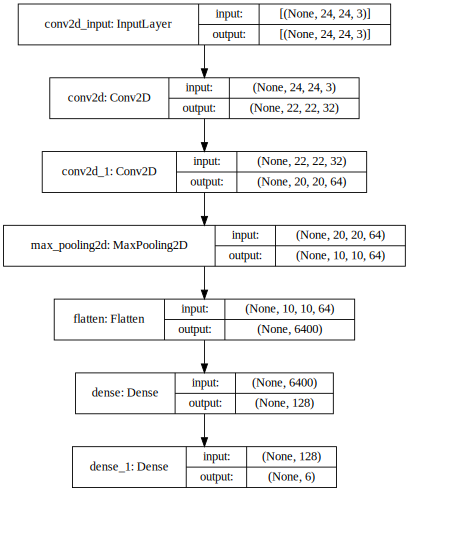

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

model = Sequential()
model.add(
    Conv2D(32,kernel_size=(3, 3),
           activation='relu',input_shape=(24,24,3))
)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

# 모델 가시화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=64).create(prog='dot', format='svg'))

In [3]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit_generator(
    train_generator,
    epochs=100,
    validation_data=test_generator,
)

/home/gusdn9754/keras-practice/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
15/15 [==============================] - 2s 70ms/step - loss: 1.8469 - accuracy: 0.2342 - val_loss: 1.7835 - val_accuracy: 0.1667
Epoch 2/100
15/15 [==============================] - 0s 16ms/step - loss: 1.7292 - accuracy: 0.2051 - val_loss: 1.7151 - val_accuracy: 0.1667
Epoch 3/100
15/15 [==============================] - 0s 17ms/step - loss: 1.5225 - accuracy: 0.3763 - val_loss: 1.6203 - val_accuracy: 0.4000
Epoch 4/100
15/15 [==============================] - 0s 17ms/step - loss: 1.3704 - accuracy: 0.5195 - val_loss: 1.5605 - val_accuracy: 0.5000
Epoch 5/100
15/15 [==============================] - 0s 15ms/step - loss: 1.2590 - accuracy: 0.4926 - val_loss: 1.7488 - val_accuracy: 0.4000
Epoch 6/100
15/15 [==============================] - 0s 16ms/step - loss: 1.2558 - accuracy: 0.4911 - val_loss: 1.8623 - val_accuracy: 0.3333
Epoch 7/100
15/15 [==============================] - 0s 17ms/step - loss: 1.1670 - accuracy: 0.5579 - val_loss: 1.8473 - val_accuracy: 0.3000
Epoch 

15/15 [==============================] - 0s 16ms/step - loss: 0.2253 - accuracy: 0.9168 - val_loss: 0.9464 - val_accuracy: 0.6333
Epoch 59/100
15/15 [==============================] - 0s 16ms/step - loss: 0.3825 - accuracy: 0.8615 - val_loss: 0.7426 - val_accuracy: 0.7333
Epoch 60/100
15/15 [==============================] - 0s 16ms/step - loss: 0.5596 - accuracy: 0.7678 - val_loss: 1.1903 - val_accuracy: 0.5333
Epoch 61/100
15/15 [==============================] - 0s 15ms/step - loss: 0.4084 - accuracy: 0.8116 - val_loss: 0.8994 - val_accuracy: 0.6000
Epoch 62/100
15/15 [==============================] - 0s 16ms/step - loss: 0.3427 - accuracy: 0.8826 - val_loss: 1.2439 - val_accuracy: 0.6667
Epoch 63/100
15/15 [==============================] - 0s 18ms/step - loss: 0.3399 - accuracy: 0.8944 - val_loss: 1.2725 - val_accuracy: 0.5000
Epoch 64/100
15/15 [==============================] - 0s 16ms/step - loss: 0.2868 - accuracy: 0.8926 - val_loss: 1.5534 - val_accuracy: 0.6000
Epoch 65/100

In [4]:
print("-- Evaluate --")
scores = model.evaluate(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
5/5 [==============================] - 0s 5ms/step - loss: 1.0384 - accuracy: 0.7000
accuracy: 70.00%


In [5]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

print(test_generator.filenames)

-- Predict --


/home/gusdn9754/keras-practice/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


{'circle': 0, 'question': 1, 'rectangle': 2, 'triangle': 3, 'v': 4, 'x': 5}
[[0.000 0.000 0.941 0.059 0.000 0.000]
 [0.003 0.001 0.047 0.779 0.170 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000]
 [0.016 0.000 0.980 0.004 0.000 0.000]
 [0.000 0.000 0.853 0.147 0.000 0.000]
 [0.000 0.006 0.000 0.000 0.920 0.074]
 [0.000 0.000 0.000 0.006 0.991 0.003]
 [0.000 0.000 0.000 0.259 0.741 0.000]
 [0.001 0.000 0.993 0.005 0.000 0.000]
 [0.046 0.012 0.933 0.009 0.000 0.000]
 [0.000 0.000 0.995 0.005 0.000 0.000]
 [0.000 0.001 0.000 0.008 0.989 0.003]
 [0.000 0.000 0.981 0.019 0.000 0.000]
 [0.012 0.000 0.988 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000]
 [0.836 0.000 0.164 0.000 0.000 0.000]
 [0.015 0.557 0.243 0.006 0.168 0.011]
 [0.000 0.000 0.039 0.961 0.000 0.000]
 [0.001 0.998 0.000 0.000 0.000 0.000]
 [0.000 0.996 0.000 0.004 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.216 0.784]
 [0.000 0.003 0.000 0.362 0.607 0.028]
 [0.000 0.000 0.000 0.000 0.132 0.868]
 [0.000 0.866 0.000 0.134 0